# Convolutional Neural Networks (CNNs) - Practical Notebook

This notebook provides a hands-on introduction to Convolutional Neural Networks (CNNs) using TensorFlow and Keras. We will:
- Load and preprocess image data (MNIST and CIFAR-10)
- Build and train CNN models
- Evaluate performance
- Visualize results
- Experiment with hyperparameters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical

# **I. Dataset Description (MNIST)**:
The MNIST dataset is a classic benchmark in machine learning.
Composed of 70,000 grayscale images of handwritten digits (0–9), each sized 28×28 pixels.
It is split into 60,000 training and 10,000 test images.
This dataset is ideal for learning and testing image classification models due to its simplicity and well-labeled structure.



## Load and Preprocess MNIST Dataset
- We load the MNIST dataset using Keras.
- Then reshape the images to include a channel dimension (28×28×1) and normalize pixel values to the [0, 1] range.
- Labels are converted to one-hot encoded vectors, which are required for multi-class classification using softmax.

In [3]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {x_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1)


## Build CNN Model for MNIST
A simple CNN is built using Keras' Sequential API. It includes:
- Two convolutional layers to extract features.
- Max pooling layers to reduce spatial dimensions.
- A flattening layer to convert 2D data to 1D.
- Dense layers for classification, ending with a softmax layer to output probabilities for each digit class.

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN Model
- The model is trained using the Adam optimizer and categorical cross-entropy loss.
- We use a validation split to monitor performance on unseen data during training.
- Training runs for a few epochs with a batch size of 64, balancing speed and accuracy.

In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8575 - loss: 0.4510 - val_accuracy: 0.9775 - val_loss: 0.0777
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9802 - loss: 0.0649 - val_accuracy: 0.9862 - val_loss: 0.0499
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9860 - val_loss: 0.0476
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9892 - val_loss: 0.0408
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9887 - val_loss: 0.0419


## Evaluate the Model
- The model is evaluated on the test set to measure its generalization performance.
- The test accuracy indicates how well the model can classify new, unseen digit images.

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9840 - loss: 0.0506
Test accuracy: 0.9878


## Visualize Training History
- We plot training and validation accuracy over epochs to observe learning progress.
- This helps identify:
  - **overfitting** (when validation accuracy drops while training accuracy increases),
  - **underfitting** (when both accuracies are low).

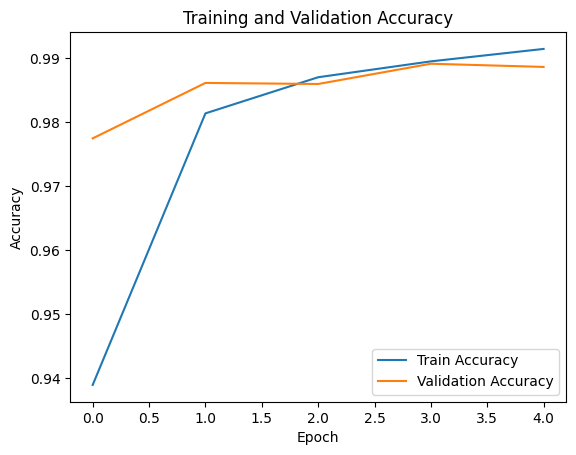

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# **II. Dataset Description (CIFAR-10)**:
- The CIFAR-10 dataset is a widely used benchmark in machine learning and computer vision.
- It consists of 60,000 color images divided into 10 distinct classes, with 6,000 images per class.
- Each image is 32×32 pixels in size and contains three color channels (RGB).
- The dataset is split into 50,000 training images and 10,000 test images



## Load and Preprocess CIFAR-10 Dataset
- CIFAR-10 is a more complex dataset with 60,000 32×32 color images across 10 classes (e.g., airplane, car, bird).
- We normalize the images and one-hot encode the labels, similar to MNIST, but with three color channels (RGB).

In [8]:
# Load CIFAR-10 data
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Normalize and one-hot encode
x_train_cifar = x_train_cifar.astype('float32') / 255
x_test_cifar = x_test_cifar.astype('float32') / 255
y_train_cifar = to_categorical(y_train_cifar)
y_test_cifar = to_categorical(y_test_cifar)

print(f"CIFAR-10 training data shape: {x_train_cifar.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR-10 training data shape: (50000, 32, 32, 3)


## Build CNN Model for CIFAR-10
A deeper CNN is built to handle the complexity of CIFAR-10. It includes:
- Three convolutional layers with increasing filter depth.
- Max pooling layers to reduce spatial dimensions.
- Dense layers for classification.
- This architecture is more suitable for learning from color images with complex patterns.

In [9]:
model_cifar = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cifar.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Train the CIFAR-10 Model
- The model is trained for more epochs (e.g., 10) due to the dataset's complexity.
- We use Adam optimizer and monitor validation accuracy to ensure the model is learning effectively.

In [10]:
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 61s 85ms/step - accuracy: 0.2896 - loss: 1.9041 - val_accuracy: 0.5090 - val_loss: 1.3577
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.5306 - loss: 1.3166 - val_accuracy: 0.5966 - val_loss: 1.1677
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5975 - loss: 1.1447 - val_accuracy: 0.6062 - val_loss: 1.1118
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6391 - loss: 1.0285 - val_accuracy: 0.6544 - val_loss: 0.9841
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6693 - loss: 0.9383 - val_accuracy: 0.6498 - val_loss: 0.9898
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.6881 - loss: 0.8865 - val_accuracy: 0.6846 - val_loss: 0.8980
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.7074 - loss: 0.8415 - val_accuracy: 0.6640 - val_loss: 0.9529
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7168 - loss: 0.8046 - 

## Evaluate the CIFAR-10 Model
- We test the trained model on the CIFAR-10 test set to assess its performance
- The accuracy reflects how well the model can generalize to new images from the 10 categories.

In [11]:
test_loss_cifar, test_acc_cifar = model_cifar.evaluate(x_test_cifar, y_test_cifar)
print(f"CIFAR-10 Test accuracy: {test_acc_cifar:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6766 - loss: 0.9363
CIFAR-10 Test accuracy: 0.6758


## Experiment with Hyperparameters (ToDo):
These experiments help understand how different settings affect model performance: This section encourages students to modify:
- Number of filters or kernel sizes in convolutional layers.
- Optimizers (e.g., SGD vs. Adam).
- Number of epochs or batch size.
- Activation functions or dropout layers.



In [12]:
# Try changing number of filters, kernel size, optimizer, or number of epochs
# Example: Increase number of filters in first Conv2D layer
# You can copy the model definition and modify parameters to observe the effect on accuracy